<a href="https://colab.research.google.com/github/b-paramesh/Dataset_cleaning-Day-11/blob/main/Day_12_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Numeric encoding
import pandas as pd

df=pd.Series(['senior','senior','junior','junior','manager','manager','senior','manager','junior','junior'
,'junior','manager','manager','senior','manager','junior','junior','junior','manager','manager','senior'])
encoding={'manager':1,'senior':2,'junior':3}
encoding_series=df.map(encoding)
print(encoding_series)

0     2
1     2
2     3
3     3
4     1
5     1
6     2
7     1
8     3
9     3
10    3
11    1
12    1
13    2
14    1
15    3
16    3
17    3
18    1
19    1
20    2
dtype: int64


In [ ]:
# one hot ecoding dummy
import pandas as pd

# Original Series
levels = pd.Series(['senior','senior','junior','junior','manager','manager','senior','manager','junior','junior'
,'junior','manager','manager','senior','manager','junior','junior','junior','manager','manager','senior'])

one_hot = pd.get_dummies(levels)

print(one_hot)


    junior  manager  senior
0    False    False    True
1    False    False    True
2     True    False   False
3     True    False   False
4    False     True   False
5    False     True   False
6    False    False    True
7    False     True   False
8     True    False   False
9     True    False   False
10    True    False   False
11   False     True   False
12   False     True   False
13   False    False    True
14   False     True   False
15    True    False   False
16    True    False   False
17    True    False   False
18   False     True   False
19   False     True   False
20   False    False    True


In [ ]:
# ordinal encoding
ordinal_cat = pd.Categorical(
    df["Level"],
    categories=["Junior", "Senior", "Manager"],
    ordered=True
)
df["Ordinal"] = ordinal_cat.codes
print(df)


KeyError: 'Level'

In [ ]:
freq = df["Level"].value_counts()
df["Frequency_Encoded"] = df["Level"].map(freq)
print(df)

KeyError: 'Level'

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/loan_approved.csv"
df=pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
col_obj=df.select_dtypes(include="object").columns
for col in col_obj:
  df[col]=df[col].fillna(df[col].mode()[0])
col_num=df.select_dtypes(include="number").columns
for col in col_num:
  df[col]=df[col].fillna(df[col].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col], uniques = pd.factorize(df[col])
    print(f"{col} mapping:", dict(enumerate(uniques)))
    print()

Loan_ID mapping: {0: 'LP001002', 1: 'LP001003', 2: 'LP001005', 3: 'LP001006', 4: 'LP001008', 5: 'LP001011', 6: 'LP001013', 7: 'LP001014', 8: 'LP001018', 9: 'LP001020', 10: 'LP001024', 11: 'LP001027', 12: 'LP001028', 13: 'LP001029', 14: 'LP001030', 15: 'LP001032', 16: 'LP001034', 17: 'LP001036', 18: 'LP001038', 19: 'LP001041', 20: 'LP001043', 21: 'LP001046', 22: 'LP001047', 23: 'LP001050', 24: 'LP001052', 25: 'LP001066', 26: 'LP001068', 27: 'LP001073', 28: 'LP001086', 29: 'LP001087', 30: 'LP001091', 31: 'LP001095', 32: 'LP001097', 33: 'LP001098', 34: 'LP001100', 35: 'LP001106', 36: 'LP001109', 37: 'LP001112', 38: 'LP001114', 39: 'LP001116', 40: 'LP001119', 41: 'LP001120', 42: 'LP001123', 43: 'LP001131', 44: 'LP001136', 45: 'LP001137', 46: 'LP001138', 47: 'LP001144', 48: 'LP001146', 49: 'LP001151', 50: 'LP001155', 51: 'LP001157', 52: 'LP001164', 53: 'LP001179', 54: 'LP001186', 55: 'LP001194', 56: 'LP001195', 57: 'LP001197', 58: 'LP001198', 59: 'LP001199', 60: 'LP001205', 61: 'LP001206', 

In [ ]:
nominal_cols = ['Gender', 'Married', 'Education', 'Property_Area']
df=pd.get_dummies(df,columns=nominal_cols,drop_first=True)
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_1,Married_1,Education_1,Property_Area_1,Property_Area_2
0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,False,False,False,False,False
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,False,True,False,True,False
2,2,0,1,3000,0.0,66.000000,360.0,1.0,0,False,True,False,False,False
3,3,0,0,2583,2358.0,120.000000,360.0,1.0,0,False,True,True,False,False
4,4,0,0,6000,0.0,141.000000,360.0,1.0,0,False,False,False,False,False


In [ ]:
# Assuming df is your DataFrame
print(df.describe())


          Loan_ID  Dependents  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000     614.000000       614.000000   
mean   306.500000    0.744300       0.133550      5403.459283   
std    177.390811    1.009623       0.340446      6109.041673   
min      0.000000    0.000000       0.000000       150.000000   
25%    153.250000    0.000000       0.000000      2877.500000   
50%    306.500000    0.000000       0.000000      3812.500000   
75%    459.750000    1.000000       0.000000      5795.000000   
max    613.000000    3.000000       1.000000     81000.000000   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
count         614.000000  614.000000        614.000000      614.000000   
mean         1621.245798  146.412162        342.000000        0.842199   
std          2926.248369   84.037468         64.372489        0.349681   
min             0.000000    9.000000         12.000000        0.000000   
25%             0.000000  100.250000        

In [ ]:
df['LoanAmount'].unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

In [ ]:
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_1,Married_1,Education_1,Property_Area_1,Property_Area_2
0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,False,False,False,False,False
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,False,True,False,True,False
2,2,0,1,3000,0.0,66.000000,360.0,1.0,0,False,True,False,False,False
3,3,0,0,2583,2358.0,120.000000,360.0,1.0,0,False,True,True,False,False
4,4,0,0,6000,0.0,141.000000,360.0,1.0,0,False,False,False,False,False


In [ ]:
df.shape

(614, 14)

In [ ]:
mean=df['ApplicantIncome'].mean()
sd=df['ApplicantIncome'].std()
df['zscore']=(df['ApplicantIncome']-mean)/sd
df['outlier']=df['zscore'].abs()>3
df

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_1,Married_1,Education_1,Property_Area_1,Property_Area_2,zscore,outlier
0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,False,False,False,False,False,0.072931,False
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,False,True,False,True,False,-0.134302,False
2,2,0,1,3000,0.0,66.000000,360.0,1.0,0,False,True,False,False,False,-0.393427,False
3,3,0,0,2583,2358.0,120.000000,360.0,1.0,0,False,True,True,False,False,-0.461686,False
4,4,0,0,6000,0.0,141.000000,360.0,1.0,0,False,False,False,False,False,0.097649,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,2900,0.0,71.000000,360.0,1.0,0,True,False,False,True,False,-0.409796,False
610,610,3,0,4106,0.0,40.000000,180.0,1.0,0,False,True,False,True,False,-0.212383,False
611,611,1,0,8072,240.0,253.000000,360.0,1.0,0,False,True,False,False,False,0.436818,False
612,612,2,0,7583,0.0,187.000000,360.0,1.0,0,False,True,False,False,False,0.356773,False


write the outliers of histogram,box plot,scipy


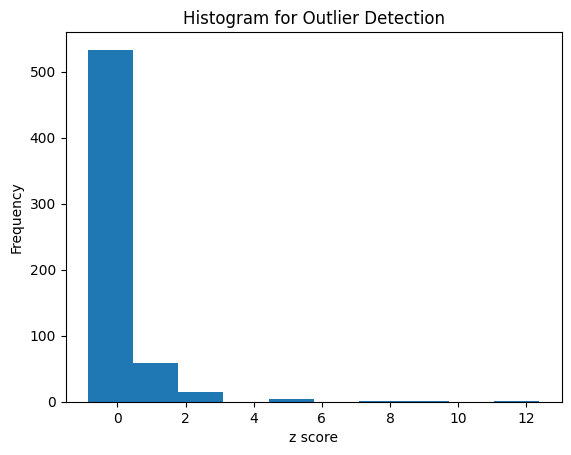

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['zscore'], bins=10)
plt.xlabel("z score")
plt.ylabel("Frequency")
plt.title("Histogram for Outlier Detection")
plt.show()


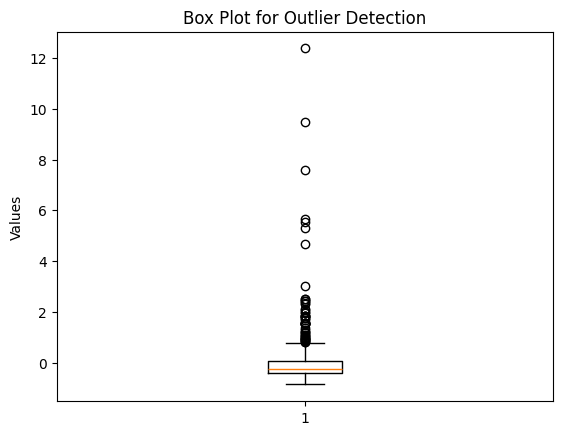

IQR Outliers:
      Loan_ID  Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  \
9          9           1              0            12841            10968.0   
34        34           3              0            12500             3000.0   
54        54           1              1            11500                0.0   
67        67           1              0            10750                0.0   
102      102           0              0            13650                0.0   
106      106           2              0            11417             1126.0   
115      115           1              0            14583                0.0   
119      119           0              0            10408                0.0   
126      126           3              0            23803                0.0   
128      128           1              1            10513             3850.0   
130      130           0              1            20166                0.0   
138      138           0             

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot Boxplot
plt.boxplot(df['zscore'])
plt.title("Box Plot for Outlier Detection")
plt.ylabel("Values")
plt.show()

# ------ IQR Outlier Detection ------
Q1 = df['zscore'].quantile(0.25)
Q3 = df['zscore'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['zscore'] < lower) | (df['zscore'] > upper)]
print("IQR Outliers:\n", outliers)


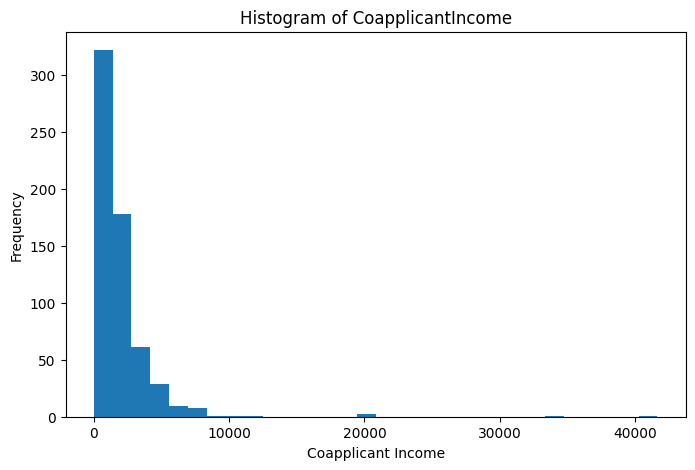

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['CoapplicantIncome'], bins=30)
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")
plt.title("Histogram of CoapplicantIncome")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


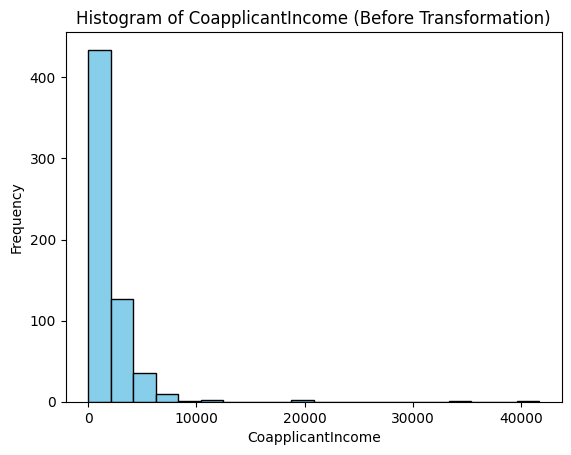

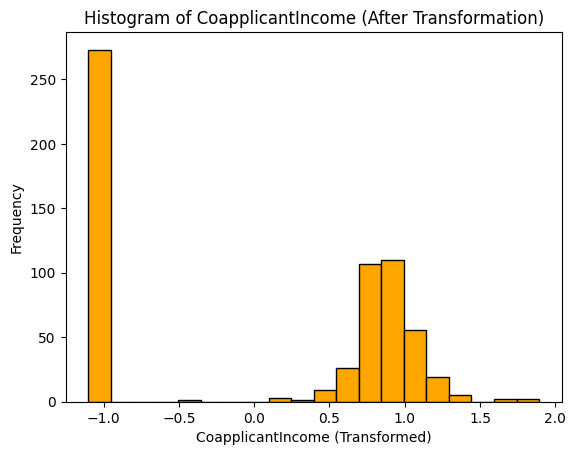

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/loan_approved.csv"
df=pd.read_csv(path)
df

import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Histogram before transformation
plt.hist(df['CoapplicantIncome'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of CoapplicantIncome (Before Transformation)')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')
plt.show()

# Power Transformation
trans = PowerTransformer(method='yeo-johnson')
coapp_trans = trans.fit_transform(df[['CoapplicantIncome']])

# Histogram after transformation
plt.hist(coapp_trans, bins=20, color='orange', edgecolor='black')
plt.title('Histogram of CoapplicantIncome (After Transformation)')
plt.xlabel('CoapplicantIncome (Transformed)')
plt.ylabel('Frequency')
plt.show()


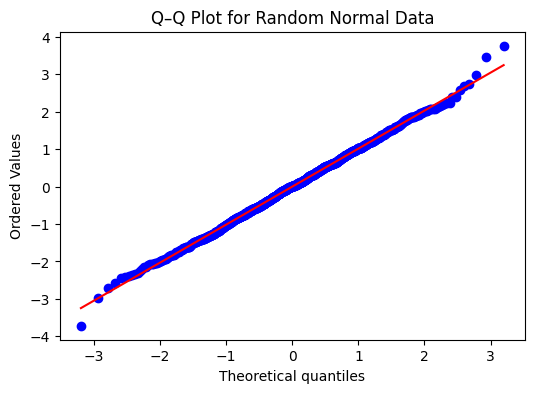

In [ ]:
import numpy as np

# Generate 1000 random values from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)


import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(6, 4))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q–Q Plot for Random Normal Data")
plt.show()

